<a href="https://colab.research.google.com/github/jluzande/CSST104-3B/blob/main/CCST104_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Task 1: Environment Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import geopandas as gpd
import folium
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


Dataset Shape: (177, 169)
        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR   

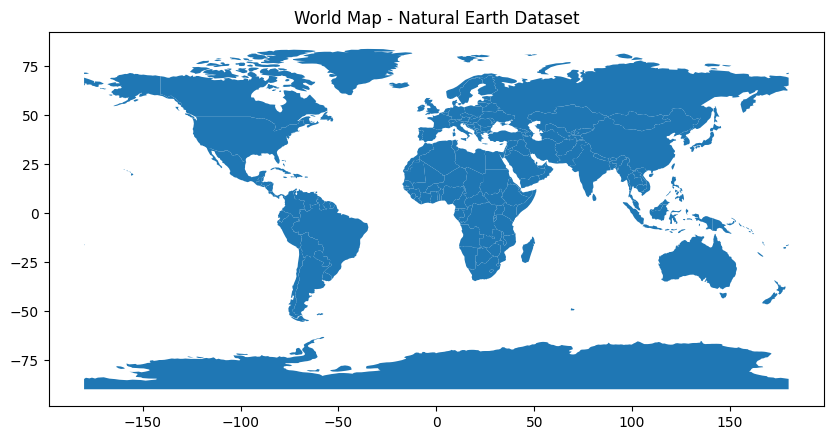

In [14]:
# Task 2: Load Natural Earth Dataset
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Preview the data
print(f"Dataset Shape: {world.shape}")
print(world.head())

# Basic Plot
world.plot(figsize=(10, 6))
plt.title("World Map - Natural Earth Dataset")
plt.show()

Task 2:

Columns: The dataset typically contains 95 or 169 columns depending on the specific version. You can see this in the "Dataset Shape" output.

Geometries: Polygon and MultiPolygon.

Geometry Column: It represents the spatial boundaries (shape) of the geographic features.

In [15]:
# Task 3: Check Coordinate Reference System
print(f"Current CRS: {world.crs}")

# Note: EPSG:4326 is WGS84 (Lat/Long)

Current CRS: EPSG:4326


Task 3:

EPSG:4326: It represents WGS84, the standard geographic coordinate system using latitude and longitude.

Importance of CRS: It ensures that spatial data is accurately projected on a 2D surface. Without it, distances and areas will be distorted.

In [16]:
# Task 4: Convert to Metric CRS (EPSG:3857 - Web Mercator)
world_projected = world.to_crs(epsg=3857)

# Compute Area in square meters
world_projected["area_m2"] = world_projected.geometry.area

# Display the first 5 rows with Admin name and Area
print(world_projected[["ADMIN", "area_m2"]].head())
print("\nArea Reprojection ✅ Complete")

                         ADMIN       area_m2
0                         Fiji  2.128334e+10
1  United Republic of Tanzania  9.522552e+11
2               Western Sahara  1.171023e+11
3                       Canada  5.216648e+13
4     United States of America  2.186228e+13

Area Reprojection ✅ Complete


Task 4:

EPSG:4326 Accuracy: It uses degrees. Because the Earth is curved, a degree of longitude varies in physical length depending on latitude, making area calculations mathematically incorrect.

EPSG:3857 Units: It is based on meters.

In [17]:
# Task 5: Extract Centroid Coordinates
world_projected["centroid"] = world_projected.geometry.centroid
world_projected["x"] = world_projected.centroid.x
world_projected["y"] = world_projected.centroid.y

# Display extraction results
print(world_projected[["ADMIN", "x", "y"]].head())

                         ADMIN             x             y
0                         Fiji  1.824878e+07 -1.958098e+06
1  United Republic of Tanzania  3.869296e+06 -7.003071e+05
2               Western Sahara -1.348403e+06  2.794163e+06
3                       Canada -1.079779e+07  1.044422e+07
4     United States of America -1.329713e+07  6.667416e+06


Task 5:Centroid: The geometric center of a polygon.Clustering: Centroids provide a single $(x, y)$ coordinate per country, which can be used as input features for algorithms like K-Means.Separate X and Y: Machine learning models require distinct numerical input features for each dimension.

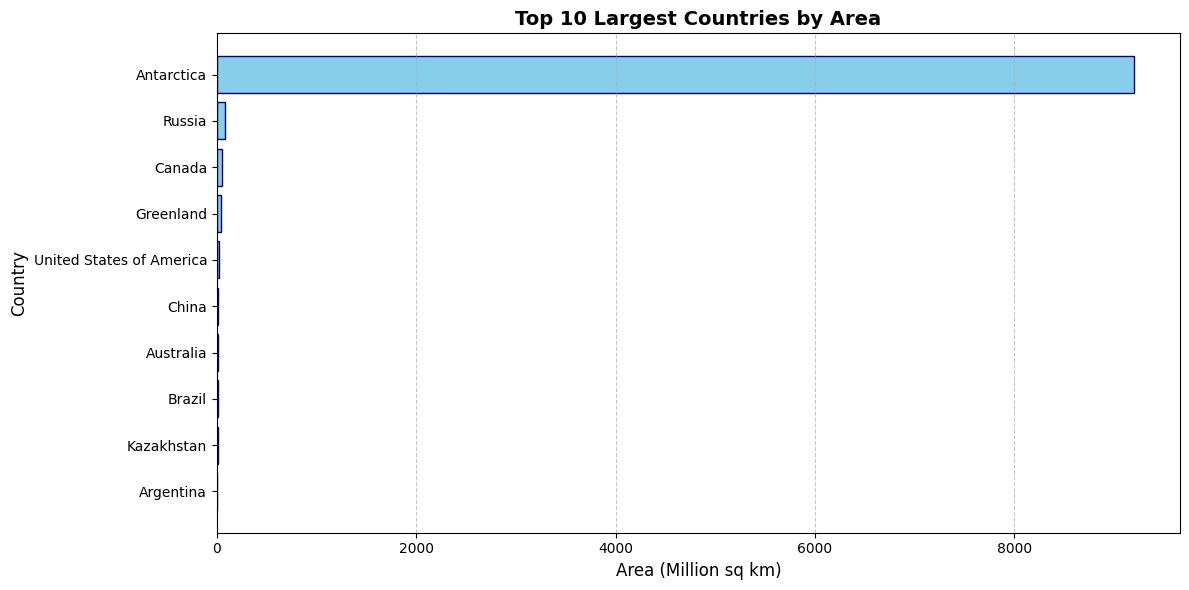

In [18]:
# Task 5: Plot the top 10 largest countries by area (Bar Graph)
top_10 = world_projected.nlargest(10, 'area_m2')

# Convert area to Million Square Kilometers for better readability
top_10['area_mkm2'] = top_10['area_m2'] / 1e12

# Create the Bar Graph
plt.figure(figsize=(12, 6))
plt.barh(top_10['ADMIN'], top_10['area_mkm2'], color='skyblue', edgecolor='navy')

# Formatting for "Code Quality" points
plt.xlabel('Area (Million sq km)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 10 Largest Countries by Area', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Put the largest country at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()